# Sociophonetic properties of vowels and fricatives
[4]

LING 497 Phonetic Analysis: Articulation, Acoustics, Audition

The Pennsylvania State University

[Prof. Deborah Morton](https://deborahcmorton.wordpress.com/)

---

```{admonition} Revised
25 May 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
R.version.string # R.Version()
.libPaths()

packages <- c(
  'gridExtra',
  'magrittr',
  'phonR',
  'repr',
  'scales',
  'tidyverse',
  'vowels'
)

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Load packages
invisible(lapply(packages, library, character.only = TRUE))

[1] "R version 4.3.0 (2023-04-21)"

[1] "/Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library"

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ tidyr::extract()    masks magrittr::extract()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::set_names()  masks magrittr::set_names()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


---

## Vowels

### A comparison of my acoustic vowel space with those of other North American English dialects

#### My vowel space

vowel,F1_Hz,F2_Hz
<chr>,<dbl>,<dbl>
i,297.87,2443.90
u,320.73,1180.12
æ,792.34,1716.90
ɑ,711.39,1202.23
ɔ,623.81,965.20
ɛ,554.28,1905.20
ɪ,451.87,2041.21
ʊ,487.23,1179.56
ʌ,612.80,1398.96


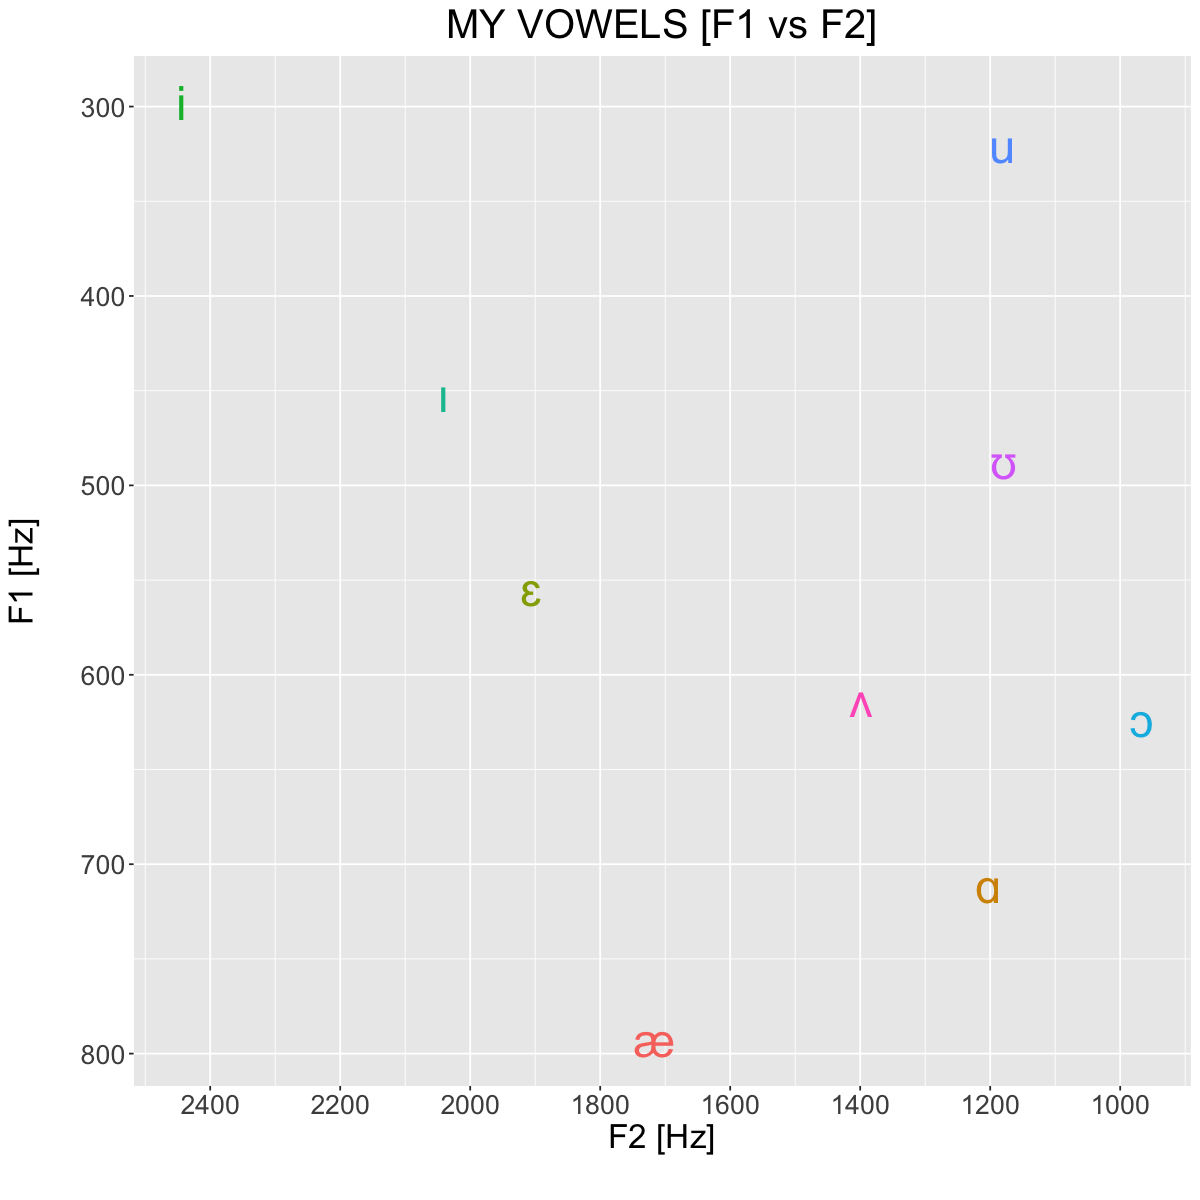

In [11]:
myVowels <- read.csv('L3_avg.csv')
myVowels

options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(myVowels, aes(x=F2_Hz, y=F1_Hz, label=vowel, color=vowel)) +
  geom_text(size=10) +
  scale_x_reverse(
      position='bottom',
      breaks=seq(0, 3000, 200)) +
  scale_y_reverse(
      position='left',
      breaks=seq(0, 1000, 100)) +
  labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='MY VOWELS [F1 vs F2]') +
  theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=20)
  )

suppressWarnings(print(plt))

#### Some North American English dialect vowel spaces

`````{tab-set}
````{tab-item} Midland
![](img/L4_20.png)
````
````{tab-item} W PA
![](img/L4_21.png)
````
````{tab-item} C OH
![](img/L4_22.png)
````
````{tab-item} N OH
![](img/L4_23.png)
````
````{tab-item} S US
![](img/L4_24.png)
````
````{tab-item} AL
![](img/L4_25.png)
````
````{tab-item} W NE
![](img/L4_26.png)
````
````{tab-item} Atlantic
![](img/L4_27.png)
````
````{tab-item} W US
![](img/L4_28.png)
````
````{tab-item} W Ca
![](img/L4_29.png)
````
`````

Examine the acoustic F1-F2 vowel spaces of different North American English dialects and how the acoustic properties of the vowels differ in order to better understand sociophonetic claims about these dialects.

Note that the plots provided of the different North American English dialects vary in terms of their representation of (i) region size (small vs large), (ii) tokens (IPA vs words), and (iii) data type (aggregate vs individual).

some North American English dialects
* Midwestern
  * [[W](https://en.wikipedia.org/wiki/Midland_American_English)] Midland (western PA; central Ohio; NOT northern Ohio)
    * [[W](https://en.wikipedia.org/wiki/Western_Pennsylvania_English)] Western PA (Pittsburghese)
    * Central OH
  * [[W](https://en.wikipedia.org/wiki/Inland_Northern_American_English)] Northern OH (Inland)
* [[W](https://en.wikipedia.org/wiki/Southern_American_English)] Southern
  * Alabama
* Northern Atlantic
  * [[W](https://en.wikipedia.org/wiki/Western_New_England_English)] Western New England
  * [[W](https://en.wikipedia.org/wiki/Atlantic_Canadian_English)] Atlantic Provinces (Eastern Canada)
* Western North American
  * [[W](https://en.wikipedia.org/wiki/Western_American_English)] Western US
  * [[W](https://en.wikipedia.org/wiki/Standard_Canadian_English)] Western/Central Canada


        Approximate formant ranges based on visual inspection
        
                F1       F2
          me     300-800   965-2445
        MIDLAND  410-820  1175-2375
        W PA     400-800  1125-2375
        C OH     450-975  1375-2400
        N OH     350-750  1200-2400
        S US     450-810  1175-2225
          AL     325-875  1100-2500
        W NE     440-830  1175-2275
        Atlantic 360-820  1225-2500
        W US     400-810  1225-2400
        W Ca     380-830  1110-2475

[1] What surprises you about any of the vowel plots or how they compare to your own?



[2] Which of the vowel plots looks the most similar to yours?

My dialect of spoken North American English is most closely related to [Philadelphia English](https://en.wikipedia.org/wiki/Philadelphia_English).

[3] Does [1] make sense in terms of which geographical area you would expect your vowels to match the most?

[4] What else, if anything, stands out about this data?

### Corpus vowel observations

In [4]:
df0 <- data.frame(
  vowel=c(
    'i','u','æ','ɑ',
    #'ɔ',
    'ɛ','ɪ',
    #'ʊ',
    'ʌ','e','o'
  ),
  F1=c(
    265.5198425198318,
    265.85733916924033,
    617.377618617203,
    640.7758865066211,
    #0,
    544.5743823332352,
    408.2927482004889,
    #0,
    553.5343117038954,
    356.1113950654619,
    343.94824459258894
  ),
  F2=c(
    2199.498417751351,
    1189.0378933015656,
    1722.7116555777932,
    1159.8028169201725,
    #0,
    1562.3880459617742,
    1579.1947625778555,
    #0,
    1182.0606741128356,
    2166.9128120306286,
    1633.1822369113345
  )
)
df0

vowel,F1,F2
<chr>,<dbl>,<dbl>
i,265.5198,2199.498
u,265.8573,1189.038
æ,617.3776,1722.712
ɑ,640.7759,1159.803
ɛ,544.5744,1562.388
ɪ,408.2927,1579.195
ʌ,553.5343,1182.061
e,356.1114,2166.913
o,343.9482,1633.182


### A comparison of my vowel space with the corpus vowel space

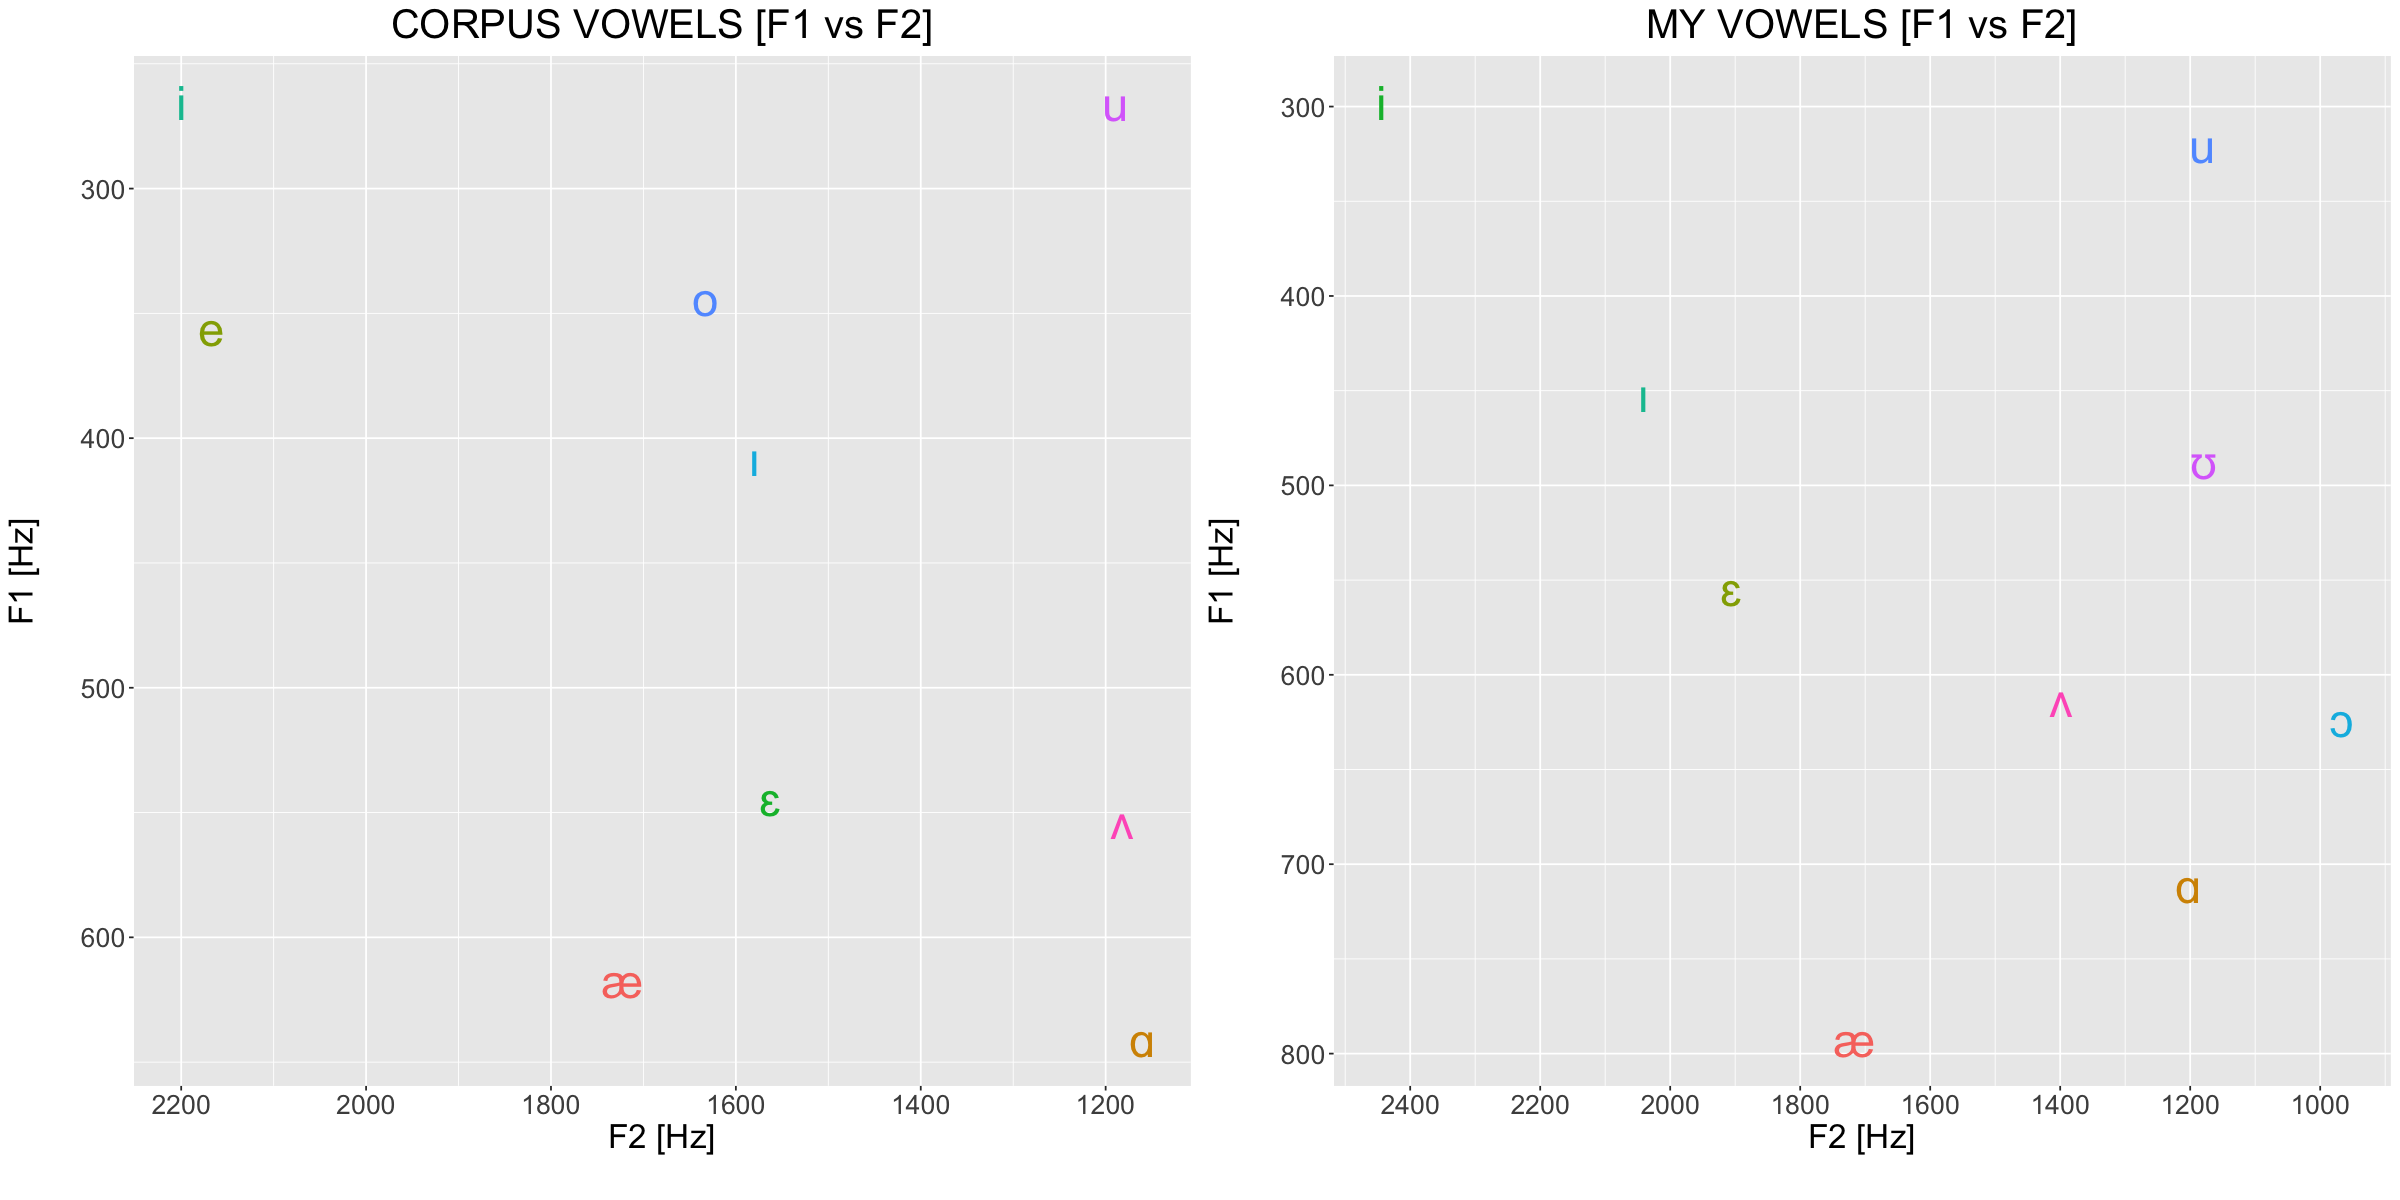

In [5]:
options(repr.plot.width=20, repr.plot.height=10)

plt0 <- ggplot(df0, aes(x=F2, y=F1, label=vowel, color=vowel)) +
  geom_text(size=10) +
  scale_x_reverse(
      position='bottom',
      breaks=seq(0, 3000, 200)) +
  scale_y_reverse(
      position='left',
      breaks=seq(0, 1000, 100)) +
  labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='CORPUS VOWELS [F1 vs F2]') +
  theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=20)
  )

plt1 <- ggplot(myVowels, aes(x=F2_Hz, y=F1_Hz, label=vowel, color=vowel)) +
  geom_text(size=10) +
  scale_x_reverse(
      position='bottom',
      breaks=seq(0, 3000, 200)) +
  scale_y_reverse(
      position='left',
      breaks=seq(0, 1000, 100)) +
  labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='MY VOWELS [F1 vs F2]') +
  theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=20)
  )

suppressWarnings(grid.arrange(plt0,plt1,ncol=2))

## Fricatives

### Spectrograms

`````{tab-set}
````{tab-item} my [sh] duration
![](img/L4_00_me_sh_duration.png)
````
````{tab-item} my [s] duration
![](img/L4_01_me_s_duration.png)
````
````{tab-item} e81 [sh] duration
![](img/L4_02_e81_sh_duration.png)
````
````{tab-item} e81 [s] duration
![](img/L4_03_e81_s_duration.png)
````
````{tab-item} my [sh] spectral slice
![](img/L4_04_me_sh_spectral_slice.png)
````
````{tab-item} my [s] spectral slice
![](img/L4_05_me_s_spectral_slice.png)
````
````{tab-item} e81 [sh] spectral slice
![](img/L4_06_e81_sh_spectral_slice.png)
````
````{tab-item} e81 [s] spectral slice
![](img/L4_07_e81_s_spectral_slice.png)
````
`````

### Power Spectra

`````{tab-set}
````{tab-item} my [sh] spectral peak
![](img/L4_08_me_sh_spectral_peak.png)
````
````{tab-item} my [s] spectral peak
![](img/L4_09_me_s_spectral_peak.png)
````
````{tab-item} e81 [sh] spectral peak
![](img/L4_10_e81_sh_spectral_peak.png)
````
````{tab-item} e81 [s] spectral peak
![](img/L4_11_e81_s_spectral_peak.png)
````
`````

### Spectral Measurements

In [8]:
fricatives <- tribble(
  ~subject,~fricative,~spectral_peak_Hz,~spectral_peak_dB,
  #-------|----------|-----------------|------------------
   'eng81',       's',          3593.21,             26.2,
   'eng81',      'sh',          2920.75,             36.9,
      'me',       's',          4476.06,             25.2,
      'me',      'sh',          5248.52,             26.7
)
fricatives

subject,fricative,spectral_peak_Hz,spectral_peak_dB
<chr>,<chr>,<dbl>,<dbl>
eng81,s,3593.21,26.2
eng81,sh,2920.75,36.9
me,s,4476.06,25.2
me,sh,5248.52,26.7


---

## Terms

* [[W](https://en.wikipedia.org/wiki/American_English)] American English
* [[W](https://en.wikipedia.org/wiki/Appalachian_English)] Appalachian English
* [[W](https://en.wikipedia.org/wiki/Atlantic_Canadian_English)] Atlantic Canadian English
* [[W](https://en.wikipedia.org/wiki/Atlantic_Canada)] Atlantic Provinces
* [[W](https://en.wikipedia.org/wiki/The_Atlas_of_North_American_English)] The Atlas of North American English
* [[W](https://en.wikipedia.org/wiki/Australian_English)] Australian English
* [[W](https://en.wikipedia.org/wiki/Baltimore_accent)] Baltimorese
* [[W](https://en.wikipedia.org/wiki/British_English)] British English
* [[W](https://en.wikipedia.org/wiki/California_English)] California English
* [[W](https://en.wikipedia.org/wiki/Canadian_English)] Canadian English
* [[W](https://en.wikipedia.org/wiki/Canadian_raising)] Canadian Raising
* [[W](https://en.wikipedia.org/wiki/Canadian_Shift)] Canadian Shift
* [[W](https://en.wikipedia.org/wiki/Chain_shift)] Chain Shift
* [[W](https://en.wikipedia.org/wiki/Cot%E2%80%93caught_merger)] Cot-Caught Merger
* [[W](https://en.wikipedia.org/wiki/Dialect_continuum)] Dialect Continuum
* [[W](https://en.wikipedia.org/wiki/Dialect_levelling)] Dialect Leveling
* [[W](https://en.wikipedia.org/wiki/Early_Modern_English)] Early Modern English
* [[W](https://en.wikipedia.org/wiki/Eastern_New_England_English)] Eastern New England English
* [[W](https://en.wikipedia.org/wiki/English-language_vowel_changes_before_historic_/r/)] English-language vowel changes before historic /r/ 
* [[W](https://en.wikipedia.org/wiki/General_American_English)] General American English
* [[W](https://en.wikipedia.org/wiki/Great_Vowel_Shift)] Great Vowel Shift
* [[W](https://en.wikipedia.org/wiki/Inland_Northern_American_English)] Inland Northern American English (Great Lakes Dialect)
* [[W](https://en.wikipedia.org/wiki/Hiberno-English)] Irish English
* [[W](https://en.wikipedia.org/wiki/Indian_English)] Indian English
* [[W](https://en.wikipedia.org/wiki/Koin%C3%A9_language)] Koiné
* [[W](https://en.wikipedia.org/wiki/Mid-Atlantic_accent)] Mid Atlantic Accent
* [[W](https://en.wikipedia.org/wiki/Middle_English)] Middle English
* [[W](https://en.wikipedia.org/wiki/Middle_English_phonology)] Middle English phonology
* [[W](https://en.wikipedia.org/wiki/Midland_American_English)] Midland American English
* [[W](https://en.wikipedia.org/wiki/Modern_English)] Modern English
* [[W](https://en.wikipedia.org/wiki/New_England_English)] New England English
* [[W](https://en.wikipedia.org/wiki/New_York_accent)] New York Accent
* [[W](https://en.wikipedia.org/wiki/New_York_City_English)] New York City English
* [[W](https://en.wikipedia.org/wiki/North_American_English_regional_phonology)] North American English regional phonology
* [[W](https://en.wikipedia.org/wiki/North_American_English)] North American English
* [[W](https://en.wikipedia.org/wiki/Northern_American_English)] Northern American English
* [[W](https://en.wikipedia.org/wiki/North-Central_American_English)] Northern Central American English
* [[W](https://en.wikipedia.org/wiki/Old_English)] Old English
* [[W](https://en.wikipedia.org/wiki/Old_English_phonology)] Old English phonology
* [[W](https://en.wikipedia.org/wiki/Older_Southern_American_English)] older Southern American dialects
* [[W](https://en.wikipedia.org/wiki/Pacific_Northwest_English)] Pacific Northwest English
* [[W](https://en.wikipedia.org/wiki/Philadelphia_English)] Philadelphia English
* [[W](https://en.wikipedia.org/wiki/Phonological_history_of_English_close_front_vowels)] phonological history of English close front vowels
* [[W](https://en.wikipedia.org/wiki/Phonological_history_of_English_open_back_vowels)] phonological history of English open back vowels
* [[W](https://en.wikipedia.org/wiki/Received_Pronunciation)] Received Pronunciation (RP)
* [[W](https://en.wikipedia.org/wiki/Rhoticity_in_English)] Rhoticity in English
* [[W](https://en.wikipedia.org/wiki/South_African_English)] South African English
* [[W](https://en.wikipedia.org/wiki/Southern_American_English)] Southern American English
* [[W](https://en.wikipedia.org/wiki/Standard_Canadian_English)] Standard Canadian English
* [[W](https://en.wikipedia.org/wiki/Standard_English)] Standard English
* [[W](https://en.wikipedia.org/wiki/Texan_English)] Texan English
* [[W](https://en.wikipedia.org/wiki/Vowel_shift)] Vowel Shift
* [[W](https://en.wikipedia.org/wiki/Western_American_English)] Western American English
* [[W](https://en.wikipedia.org/wiki/Western_New_England_English)] Western New England English
* [[W](https://en.wikipedia.org/wiki/Western_Pennsylvania_English)] Western Pennsylvania English (Pittsburghese)

---

## Bibliography

* [[W](https://en.wikipedia.org/wiki/The_Atlas_of_North_American_English)] Labov, William; Sharon Ash; & Charles Boberg. (2006). _The Atlas of North American English_. [Berlin: Mouton-de Gruyter](https://www.degruyter.com/document/doi/10.1515/9783110167467/html?lang=en).
* english81. _The Speech Accent Archive_. [Page](https://accent.gmu.edu/browse_language.php?function=detail&speakerid=145).

---